## Assignment 4
Max Norton

### Exercise 7

In [2]:
using Plots, Distributions

In [20]:
function walk!(x, params=[.2, 1.0])
    α=params[1]; σ=params[2];
    x = α*x + σ*randn()
end

function makeser(f!, xi, a, n, params)
    ts = ones(n)
    ts[1]=xi
    for i in 2:n-1
        ts[i] = f!(ts[i-1], params)[1]
    end
    ts[n]=0
    Ta=200
    for i in 2:n-1
        if ts[i]<= a
            Ta=i
            break
        end
    end
    (ts, Ta)
end

function getsomeTas(f!, thismany, xi, a, n, params)
    fpt = Array{Int64}(thismany)
    for i in 1:thismany
        fpt[i] = makeser(f!, xi, a, n, params)[2]
    end
    fpt
end

getsomeTas (generic function with 1 method)

1. Plot a histogram of $T_0$ for 100 random walks with $t_{max}=200.$

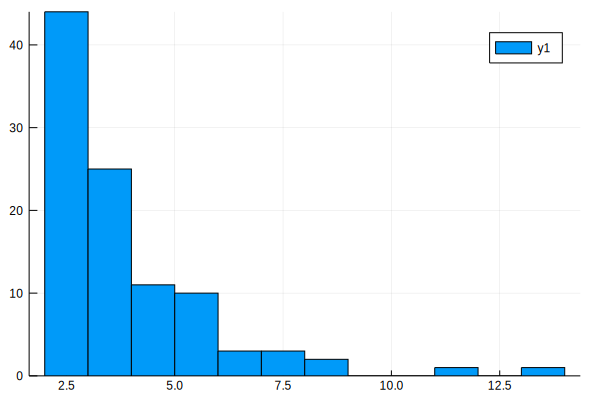

In [22]:
n=200; params=[.2, 1.0]; xi=1; a=0;

vals = getsomeTas(walk!, 100, xi, a, n, params)
histogram(vals)

2. Plot the sample mean of $T_0$ for $α \in \{0.5, 1.0, 1.2\}$

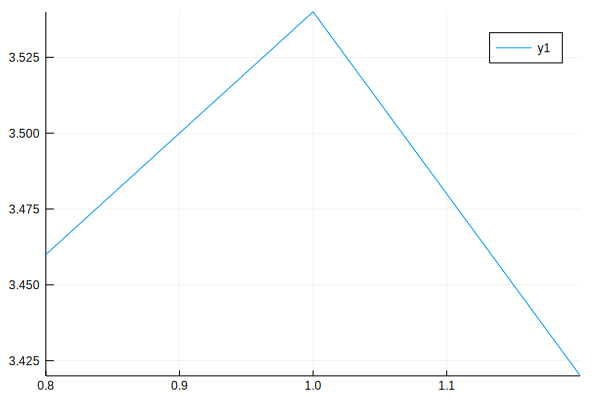

In [28]:
means = [mean(getsomeTas(walk!, 100, xi, a, n, [0.2, 0.8])),
    mean(getsomeTas(walk!, 100, xi, a, n, [0.2, 1.0])),
    mean(getsomeTas(walk!, 100, xi, a, n, [0.2, 1.2]))]
plot([0.8, 1.0, 1.2], means)

### Exercise 8(a)

In [47]:
function newton(f, f_prime, x_0; tolerance = 1E-7, maxiter = 1000)
    x_old = x_0
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = x_old - f(x_old)/f_prime(x_old) #implement the Newtom alg
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter += 1
    end
    return (x_old, normdiff, iter)
end

newton (generic function with 1 method)

In [48]:
f(x) = (x-1)^3; f_prime(x) = 3*(x-1)^2; x_0=0;
newton(f, f_prime, x_0)

(0.9999998643434097, 6.782829509166532e-8, 40)

Note true root is 1 so check that.

In [49]:
norm(1-newton(f, f_prime, x_0)[1]) <= 1E-7

false

Comment: not sure why Newton method doesn't converge perfectly with this function, but it works with the next one.

In [53]:
new_f(x) = x^2 - 9; new_f_prime(x) = 2*x
newton(new_f, new_f_prime, 1) # can't start at 0 
                              # or it's in the denominator

(3.0, 1.3969838619232178e-9, 7)

Check it converges to the right root: 3.

In [56]:
norm(3-newton(new_f, new_f_prime, 1)[1]) <= 1E-7

true

### Excercise 8(b)

In [60]:
using ForwardDiff
D(f) = x -> ForwardDiff.derivative(f, x)
f_prime_calc = D(f)

#check if this works
newton(f, f_prime_calc, 0)

(0.9999998643434097, 6.782829509166532e-8, 40)

Looks the same. Now make it do the differentiation as part of the function itself.

In [61]:
function autonewton(f, x_0; tolerance = 1E-7, maxiter = 1000)
    Diff(f) = x -> ForwardDiff.derivative(f, x)
    f_prime = Diff(f)
    x_old = x_0
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = x_old - f(x_old)/f_prime(x_old) #implement the Newtom alg
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter += 1
    end
    return (x_old, normdiff, iter)
end

autonewton (generic function with 1 method)

In [62]:
autonewton(f, x_0)

(0.9999998643434097, 6.782829509166532e-8, 40)

In [63]:
autonewton(new_f, 5)

(3.0, 1.3969838619232178e-9, 6)